##  Enosh Nyarige 
### Data Mining Final Project
#### Credit Card Fraud Detection

##### Jan - April 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

## 1. Methods applied to acquire data

- Loading the downloaded dataset

In [2]:
!ls

creditCard_fraudDetection.ipynb  dataset  models  README.md


In [3]:
data = pd.read_csv("dataset/creditcard.csv")
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- In this dataset, we can only use Time, Amount and Class columns. 

- The class feature is in the form of: 
    - 1: fraud
    - 0: not_fraud

- From the Class feature, the value counts for the two labels is 284315 and 492 for not_fraud and fraud respectively

In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

- Create a distribution graph for both labels

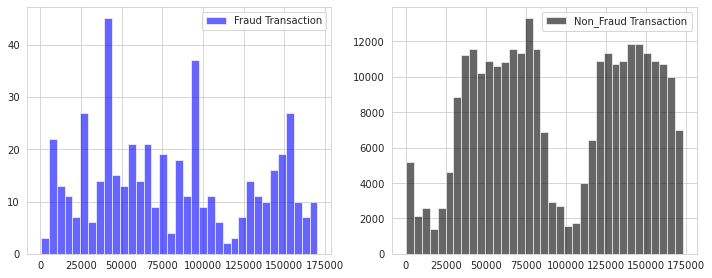

In [6]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraud Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='black', alpha=0.6, label="Non_Fraud Transaction")
plt.legend()

- Split the dataset for training and testing

   ## 4. Model building

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

In [8]:
scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_validator, X_test, y_validator, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_validator, y_validator, test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

In [9]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

## 5. Training of the model

In [10]:
print("\n")
print(f"Training Set: X_train: {X_train.shape}, y_train: {y_train.shape}\n\n{'*'*60}\n")
print(f"Validation Set: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n\n{'*'*60}\n")
print(f"Testing Set: X_test: {X_test.shape}, y_test: {y_test.shape}")
print("\n")



Training Set: X_train: (159491, 30), y_train: (159491,)

************************************************************

Validation Set: X_validate: (39873, 30), y_validate: (39873,)

************************************************************

Testing Set: X_test: (85443, 30), y_test: (85443,)




In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [12]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('models/fraud_model.h5', save_best_only=True,monitor='val_loss', mode='min')]
# class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/300
78/78 [==============================] - 4s 36ms/step - loss: 0.6563 - fn: 24.7975 - fp: 22257.7089 - tn: 59492.8734 - tp: 112.2911 - precision: 0.0045 - recall: 0.8046 - val_loss: 0.1812 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 2/300
78/78 [==============================] - 2s 30ms/step - loss: 0.1518 - fn: 48.6962 - fp: 471.0253 - tn: 81270.4810 - tp: 97.4684 - precision: 0.1574 - recall: 0.6843 - val_loss: 0.0369 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 3/300
78/78 [==============================] - 3s 33ms/step - loss: 0.0405 - fn: 49.7342 - fp: 93.0886 - tn: 81648.1519 - tp: 96.6962 - precision: 0.4685 - recall: 0.6581 - val_loss: 0.0176 - val_fn: 15.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 54.0000 - val_precision: 0.8182 - val_recall: 0.7826
Epoch 4/300
78/78 [============================

Epoch 27/300
78/78 [==============================] - 2s 31ms/step - loss: 0.0024 - fn: 34.3165 - fp: 10.6962 - tn: 81727.1013 - tp: 115.5570 - precision: 0.9109 - recall: 0.7736 - val_loss: 0.0046 - val_fn: 19.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 50.0000 - val_precision: 0.9091 - val_recall: 0.7246
Epoch 28/300
78/78 [==============================] - 2s 30ms/step - loss: 0.0025 - fn: 35.0380 - fp: 9.2152 - tn: 81723.8734 - tp: 119.5443 - precision: 0.9360 - recall: 0.7835 - val_loss: 0.0042 - val_fn: 22.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 47.0000 - val_precision: 0.9038 - val_recall: 0.6812
Epoch 29/300
78/78 [==============================] - 2s 32ms/step - loss: 0.0031 - fn: 43.0633 - fp: 12.5696 - tn: 81722.3671 - tp: 109.6709 - precision: 0.9012 - recall: 0.6881 - val_loss: 0.0045 - val_fn: 16.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 53.0000 - val_precision: 0.8548 - val_recall: 0.7681
Epoch 30/300
78/78 [==============================

Epoch 53/300
78/78 [==============================] - 2s 30ms/step - loss: 0.0017 - fn: 25.7342 - fp: 13.7215 - tn: 81721.8354 - tp: 126.3797 - precision: 0.8978 - recall: 0.8275 - val_loss: 0.0048 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 54/300
78/78 [==============================] - 2s 31ms/step - loss: 0.0014 - fn: 25.2405 - fp: 5.2152 - tn: 81735.0886 - tp: 122.1266 - precision: 0.9677 - recall: 0.8216 - val_loss: 0.0046 - val_fn: 15.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 54.0000 - val_precision: 0.9153 - val_recall: 0.7826
Epoch 55/300
78/78 [==============================] - 2s 31ms/step - loss: 0.0017 - fn: 28.2152 - fp: 8.0886 - tn: 81731.7468 - tp: 119.6203 - precision: 0.9471 - recall: 0.8248 - val_loss: 0.0051 - val_fn: 14.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 55.0000 - val_precision: 0.8462 - val_recall: 0.7971
Epoch 56/300
78/78 [==============================

Epoch 79/300
78/78 [==============================] - 2s 29ms/step - loss: 9.7152e-04 - fn: 16.4304 - fp: 3.9241 - tn: 81736.1266 - tp: 131.1899 - precision: 0.9706 - recall: 0.8935 - val_loss: 0.0063 - val_fn: 13.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 56.0000 - val_precision: 0.8358 - val_recall: 0.8116
Epoch 80/300
78/78 [==============================] - 2s 29ms/step - loss: 8.3048e-04 - fn: 15.5696 - fp: 6.6582 - tn: 81738.8608 - tp: 126.5823 - precision: 0.9496 - recall: 0.8958 - val_loss: 0.0061 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 81/300
78/78 [==============================] - 2s 29ms/step - loss: 8.0198e-04 - fn: 14.3165 - fp: 6.1899 - tn: 81735.8987 - tp: 131.2658 - precision: 0.9480 - recall: 0.9134 - val_loss: 0.0054 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 82/300
78/78 [==================

Epoch 105/300
78/78 [==============================] - 2s 32ms/step - loss: 5.8715e-04 - fn: 10.2025 - fp: 6.2278 - tn: 81735.2532 - tp: 135.9873 - precision: 0.9660 - recall: 0.9443 - val_loss: 0.0064 - val_fn: 13.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 56.0000 - val_precision: 0.8358 - val_recall: 0.8116
Epoch 106/300
78/78 [==============================] - 2s 32ms/step - loss: 5.7045e-04 - fn: 9.5570 - fp: 5.0633 - tn: 81743.1772 - tp: 129.8734 - precision: 0.9565 - recall: 0.9353 - val_loss: 0.0066 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 107/300
78/78 [==============================] - 3s 32ms/step - loss: 4.8129e-04 - fn: 9.2025 - fp: 5.2152 - tn: 81738.5063 - tp: 134.7468 - precision: 0.9637 - recall: 0.9475 - val_loss: 0.0068 - val_fn: 14.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 55.0000 - val_precision: 0.8333 - val_recall: 0.7971
Epoch 108/300
78/78 [===============

78/78 [==============================] - 3s 32ms/step - loss: 5.1155e-04 - fn: 9.6835 - fp: 6.3038 - tn: 81740.9620 - tp: 130.7215 - precision: 0.9563 - recall: 0.9226 - val_loss: 0.0077 - val_fn: 16.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 53.0000 - val_precision: 0.8689 - val_recall: 0.7681
Epoch 131/300
78/78 [==============================] - 3s 32ms/step - loss: 6.2230e-04 - fn: 12.3038 - fp: 6.6582 - tn: 81735.0759 - tp: 133.6329 - precision: 0.9627 - recall: 0.9217 - val_loss: 0.0075 - val_fn: 14.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 55.0000 - val_precision: 0.8088 - val_recall: 0.7971
Epoch 132/300
78/78 [==============================] - 3s 32ms/step - loss: 3.7406e-04 - fn: 8.9367 - fp: 1.8608 - tn: 81745.0886 - tp: 131.7848 - precision: 0.9908 - recall: 0.9429 - val_loss: 0.0071 - val_fn: 14.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 55.0000 - val_precision: 0.8462 - val_recall: 0.7971
Epoch 133/300
78/78 [==============================

Epoch 156/300
78/78 [==============================] - 3s 36ms/step - loss: 3.3850e-04 - fn: 5.9747 - fp: 3.7468 - tn: 81734.3797 - tp: 143.5696 - precision: 0.9794 - recall: 0.9614 - val_loss: 0.0073 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 157/300
78/78 [==============================] - 3s 39ms/step - loss: 3.1863e-04 - fn: 6.6709 - fp: 2.9241 - tn: 81744.3165 - tp: 133.7595 - precision: 0.9849 - recall: 0.9591 - val_loss: 0.0071 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 158/300
78/78 [==============================] - 3s 34ms/step - loss: 3.6879e-04 - fn: 4.9494 - fp: 5.4051 - tn: 81735.8354 - tp: 141.4810 - precision: 0.9637 - recall: 0.9684 - val_loss: 0.0075 - val_fn: 12.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 57.0000 - val_precision: 0.8143 - val_recall: 0.8261
Epoch 159/300
78/78 [=================

78/78 [==============================] - 2s 29ms/step - loss: 2.6544e-04 - fn: 2.9367 - fp: 1.8101 - tn: 81737.4177 - tp: 145.5063 - precision: 0.9864 - recall: 0.9830 - val_loss: 0.0068 - val_fn: 13.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 56.0000 - val_precision: 0.8485 - val_recall: 0.8116
Epoch 182/300
78/78 [==============================] - 2s 28ms/step - loss: 4.4511e-04 - fn: 7.2405 - fp: 6.4557 - tn: 81742.4177 - tp: 131.5570 - precision: 0.9469 - recall: 0.9472 - val_loss: 0.0071 - val_fn: 13.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 56.0000 - val_precision: 0.8358 - val_recall: 0.8116
Epoch 183/300
78/78 [==============================] - 2s 28ms/step - loss: 2.4012e-04 - fn: 4.5949 - fp: 2.4684 - tn: 81737.2658 - tp: 143.3418 - precision: 0.9816 - recall: 0.9749 - val_loss: 0.0067 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 184/300
78/78 [==============================]

Epoch 207/300
78/78 [==============================] - 5s 62ms/step - loss: 2.9893e-04 - fn: 4.0127 - fp: 4.5696 - tn: 81738.0759 - tp: 141.0127 - precision: 0.9616 - recall: 0.9785 - val_loss: 0.0077 - val_fn: 12.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 57.0000 - val_precision: 0.8382 - val_recall: 0.8261
Epoch 208/300
78/78 [==============================] - 4s 49ms/step - loss: 2.6873e-04 - fn: 4.0380 - fp: 2.9494 - tn: 81734.7975 - tp: 145.8861 - precision: 0.9815 - recall: 0.9670 - val_loss: 0.0082 - val_fn: 13.0000 - val_fp: 13.0000 - val_tn: 39791.0000 - val_tp: 56.0000 - val_precision: 0.8116 - val_recall: 0.8116
Epoch 209/300
78/78 [==============================] - 3s 41ms/step - loss: 4.5474e-04 - fn: 4.2025 - fp: 3.7595 - tn: 81732.5190 - tp: 147.1899 - precision: 0.9768 - recall: 0.9786 - val_loss: 0.0072 - val_fn: 13.0000 - val_fp: 11.0000 - val_tn: 39793.0000 - val_tp: 56.0000 - val_precision: 0.8358 - val_recall: 0.8116
Epoch 210/300
78/78 [================

78/78 [==============================] - 3s 37ms/step - loss: 1.9918e-04 - fn: 5.6456 - fp: 3.7089 - tn: 81727.7595 - tp: 150.5570 - precision: 0.9812 - recall: 0.9653 - val_loss: 0.0082 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 233/300
78/78 [==============================] - 2s 31ms/step - loss: 3.5758e-04 - fn: 7.3038 - fp: 4.2405 - tn: 81740.0886 - tp: 136.0380 - precision: 0.9746 - recall: 0.9411 - val_loss: 0.0085 - val_fn: 13.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 56.0000 - val_precision: 0.8235 - val_recall: 0.8116
Epoch 234/300
78/78 [==============================] - 3s 41ms/step - loss: 4.3028e-04 - fn: 5.2785 - fp: 4.2911 - tn: 81737.8481 - tp: 140.2532 - precision: 0.9744 - recall: 0.9669 - val_loss: 0.0081 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 235/300
78/78 [==============================] 

Epoch 258/300
78/78 [==============================] - 2s 29ms/step - loss: 2.5660e-04 - fn: 5.7089 - fp: 5.6076 - tn: 81733.8228 - tp: 142.5316 - precision: 0.9521 - recall: 0.9582 - val_loss: 0.0076 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 259/300
78/78 [==============================] - 2s 29ms/step - loss: 2.7537e-04 - fn: 5.0380 - fp: 2.2152 - tn: 81738.5063 - tp: 141.9114 - precision: 0.9886 - recall: 0.9685 - val_loss: 0.0078 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 260/300
78/78 [==============================] - 2s 30ms/step - loss: 2.4036e-04 - fn: 4.8608 - fp: 1.8987 - tn: 81733.1392 - tp: 147.7722 - precision: 0.9795 - recall: 0.9513 - val_loss: 0.0081 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
Epoch 261/300
78/78 [===================

Epoch 284/300
78/78 [==============================] - 2s 29ms/step - loss: 1.9670e-04 - fn: 3.5316 - fp: 2.5823 - tn: 81744.3038 - tp: 137.2532 - precision: 0.9833 - recall: 0.9682 - val_loss: 0.0077 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
Epoch 285/300
78/78 [==============================] - 2s 29ms/step - loss: 1.9080e-04 - fn: 4.5823 - fp: 2.9367 - tn: 81738.6076 - tp: 141.5443 - precision: 0.9854 - recall: 0.9691 - val_loss: 0.0078 - val_fn: 16.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 53.0000 - val_precision: 0.8689 - val_recall: 0.7681
Epoch 286/300
78/78 [==============================] - 2s 29ms/step - loss: 1.4556e-04 - fn: 2.3671 - fp: 2.2405 - tn: 81737.0000 - tp: 146.0633 - precision: 0.9842 - recall: 0.9887 - val_loss: 0.0079 - val_fn: 16.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 53.0000 - val_precision: 0.8689 - val_recall: 0.7681
Epoch 287/300
78/78 [===================

In [13]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 3s 1000us/step - loss: 0.0051 - fn: 30.0000 - fp: 14.0000 - tn: 85293.0000 - tp: 106.0000 - precision: 0.8833 - recall: 0.7794
[0.005074308719485998, 30.0, 14.0, 85293.0, 106.0, 0.8833333253860474, 0.779411792755127]


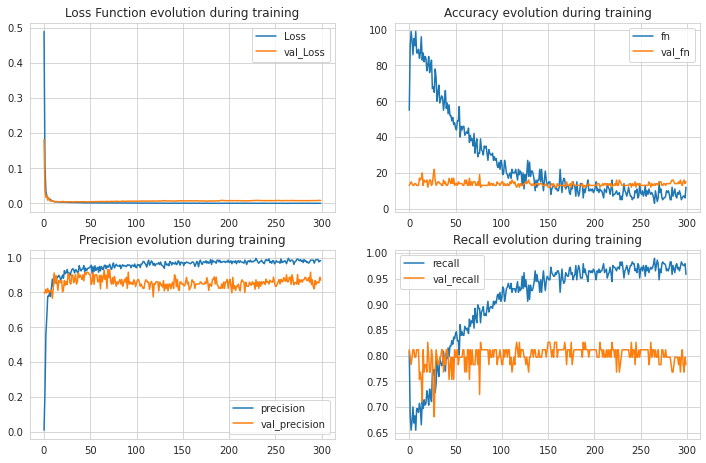

In [14]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [15]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999994    0.993056  0.999981       0.996525       0.999981
recall          0.999987    0.996516  0.999981       0.998252       0.999981
f1-score        0.999991    0.994783  0.999981       0.997387       0.999981
support    159204.000000  287.000000  0.999981  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159202      2]
 [     1    286]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999648    0.883333  0.999485      0.941491      0.999463
recall         0.999836    0.779412  0.999485      0.889624      0.999485
f1-score       0.999742    0.828125  0.999485      0.913934      0.999469

## 6. Extraction of rules, trends or patterns

## 7. Visualization of  rules, trends or patterns

## 8. Model evaluation techniques

## 9. Optimizing the evaluated model